# Scientific Data Visualization (SDV 2022)

## Campus Recruitment - Academic and Employability Factors influencing placement

### Stefan Buciu 

#### Abstract

TODO


#### Introduction

TODO

P1. Motivation

P2. Background

P3. Objectives

Q1. Why is this project important?

Q2. What did I want to investigate?

Q3. What did I expect to see?

Q4. What are the objectives?

P4. Related work - preview, reference and review


Data analysis questions:

1. Which factor influenced a candidate in getting placed?
2. Does percentage matters for a candidate to get placed?
3. Which degree specialization is much demanded by corporate?
4. Is there any gender bias?

#### Process - data analysis



In [2]:
# Load the dataset with pandas
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

placements_df = pd.read_csv('./Placement_Data_Full_Class.csv')

placements_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


##### Understanding the columns

| **Column name** | **Description**                                          |
|-----------------|----------------------------------------------------------|
| sl_no           | Serial Number                                            |
| gender          | Male='M'<br>Female='F'                                   |
| ssc_p           | Secondary Education percentage- 10th Grade               |
| ssc_b           | Board of Education- Central/ Others                      |
| hsc_p           | Higher Secondary Education percentage- 12th Grade        |
| hsc_b           | Board of Education- Central/ Others                      |
| hsc_s           | Specialization in Higher Secondary Education             |
| degree_p        | Degree Percentage                                        |
| degree_t        | Under Graduation(Degree type)- Field of degree education |
| workex          | Work experience                                          |
| etest_p         | Employability test percentage (conducted by college)     |
| specialisation  | Post Graduation (MBA)- Specialization                    |
| mba_p           | MBA percentage                                           |
| status          | Status of placement- Placed/Not placed                   |
| salary          | Salary offered by corporate to candidates                |

In [70]:
# Observing the data types

from IPython.display import display, HTML

print('Memory usage:')
display(placements_df.memory_usage(deep=True))

print('Data types:')
display(placements_df.dtypes)

print('Shape:')
placements_df.shape

Memory usage:


Index              128
sl_no             1720
gender             439
ssc_p             1720
ssc_b              450
hsc_p             1720
hsc_b              450
hsc_s              513
degree_p          1720
degree_t           517
workex             442
etest_p           1720
specialisation     450
mba_p             1720
status             453
salary            1720
dtype: int64

Data types:


sl_no                int64
gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
salary             float64
dtype: object

Shape:


(215, 15)

From the column description, we observed that some of these columns are in fact categorical, such as: gender (M/F), status (Placed/NotPlaced). We can reduce memory used.

In [9]:
gender_series = placements_df['gender'].astype('category')
print(gender_series.memory_usage(deep=True))
gender_series.head()


567


0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: category
Categories (2, object): ['F', 'M']

We reduced the memory usage from `12470` bytes to just `567`. Let's do that for every categorical column and update the main data frame.

In [14]:
dtypes = placements_df.dtypes
for columnName, columnType in dtypes.iteritems():
  if columnType == 'object':
    placements_df[columnName] = placements_df[columnName].astype('category')

print('Memory usage:')
display(placements_df.memory_usage(deep=True))

print('Data types:')
display(placements_df.dtypes)

placements_df.head()

Memory usage:


Index              128
sl_no             1720
gender             439
ssc_p             1720
ssc_b              450
hsc_p             1720
hsc_b              450
hsc_s              513
degree_p          1720
degree_t           517
workex             442
etest_p           1720
specialisation     450
mba_p             1720
status             453
salary            1720
dtype: int64

Data types:


sl_no                int64
gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
salary             float64
dtype: object

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Does this data set respect the *tidy data* norms? Yes, because:

1. we do not have any columns headers that represent values
2. every row is an observation
3. this dataset treats only one observational unit


When we looked at the head of the data frame, we saw that there is already an entry which has a missing value (the salary). Let's have a look at the missing data.

<AxesSubplot:>

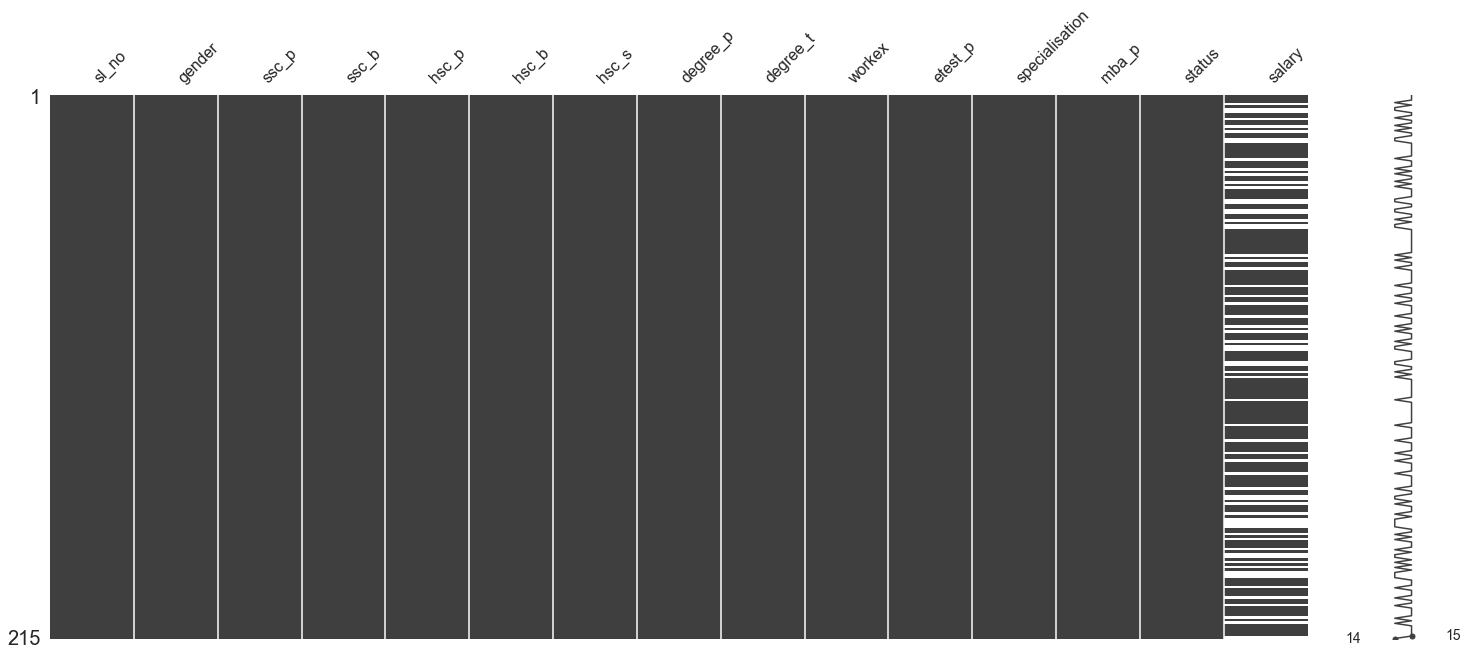

In [55]:
import missingno as msno

msno.matrix(placements_df)

We can see that the salary column has a lot of missing values. Let's see how many.

In [56]:
placements_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

There are `67` missing salary values. Fortunately, all the other columns are okay.

We cannot remove these records since they are almost one third of our dataset. Let's check if these values are missing for the people that are not working. In that case, we can set the salary as `0`.

In [63]:
placements_df[(placements_df['status'] == 'Not Placed') & (placements_df['salary'].isnull())]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


We can see that there are `67` rows which means that only the people that do not work are having NaN for salary. If there were people that were working, and with a NaN salary, that would probably mean that they did not want to disclose that information.

Let's set these values to `0`.

In [64]:
placements_df['salary'].fillna(value=0, inplace=True)

The next step is to look into outliers.

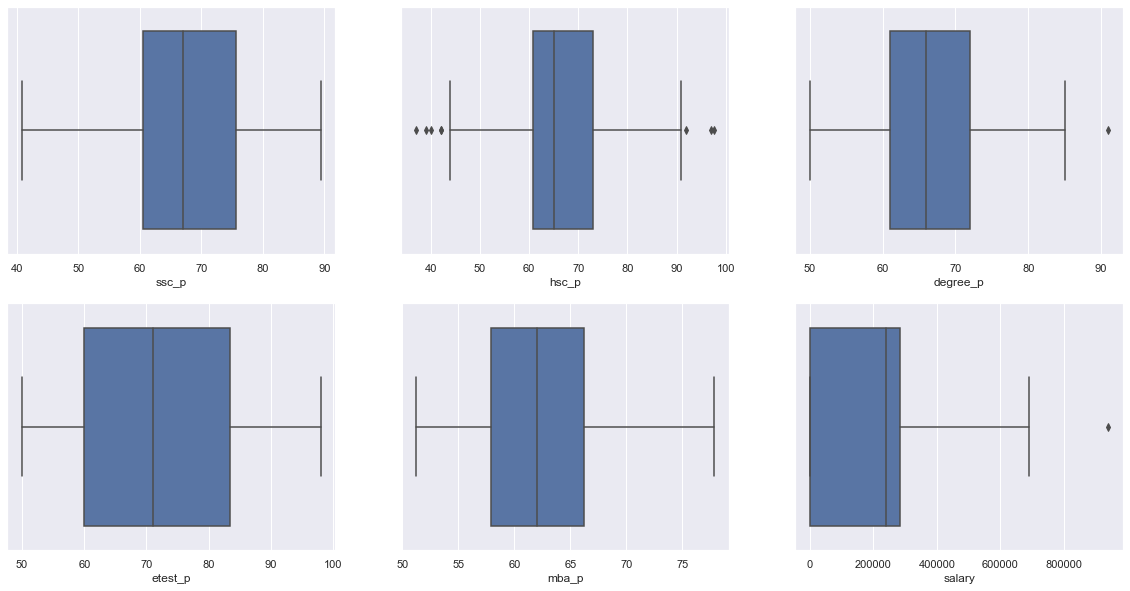

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

row = 0
col = 0
for columnName, columnType in placements_df.dtypes.iteritems():
  if columnType != 'category' and columnName != 'sl_no':
    sns.boxplot(x=columnName, data=placements_df, ax=axs[row][col])

    col += 1
  
  if col == 3:
    row = 1
    col = 0

We do not have many outliers. Most of them are located in the `hsc_p` column (i.e., Higher Secondary Education Percentage). As there are only a few of them, I will leave them in.

Now that we did our due diligence with the data set, let's start answering some of the research questions. Firstly, we want to check which factor influenced a candidate in getting placed. To begin with, we need to look at the percentages the candidates scored.

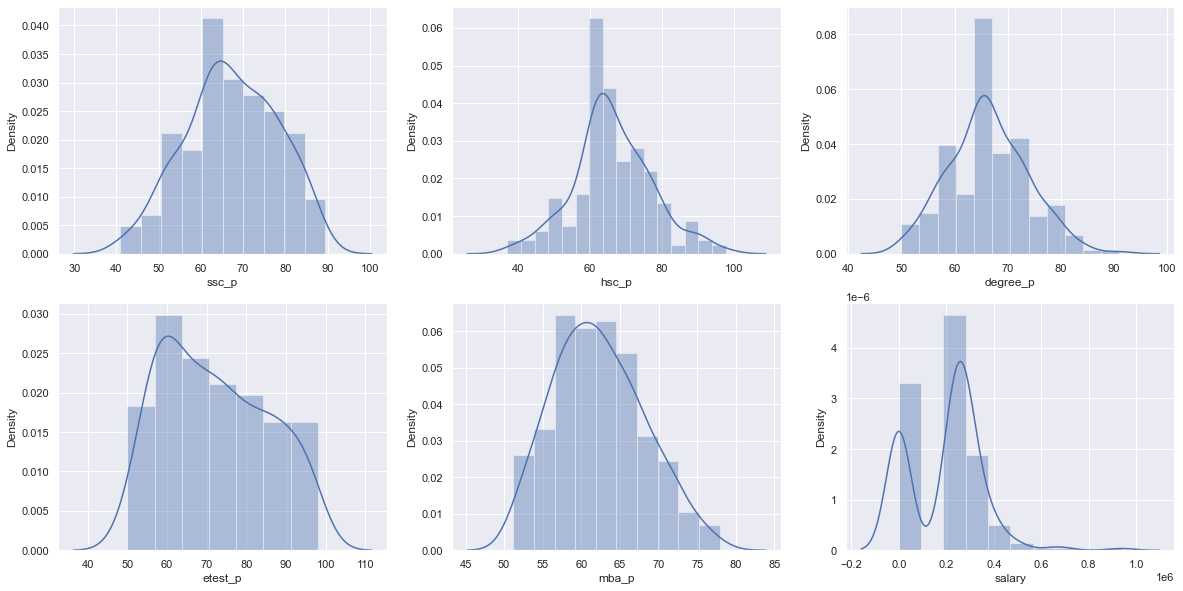

In [82]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

row = 0
col = 0
for columnName, columnType in placements_df.dtypes.iteritems():
  if columnType != 'category' and columnName != 'sl_no':
    sns.distplot(placements_df[columnName], ax=axs[row][col])
    col += 1
  
  if col == 3:
    row = 1
    col = 0

This dataset is separated by gender. We need to take this into account before taking any conclusions. Firstly, let's see if the dataset is balanced from a gender perspective.

[Text(0, 0, '139'), Text(0, 0, '76')]

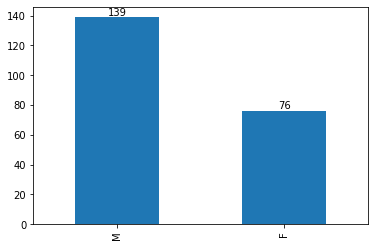

In [41]:
ax = placements_df['gender'].value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])


We can see that we have almost twice as many male records than female ones.

Let's look at all categorical features based on gender.

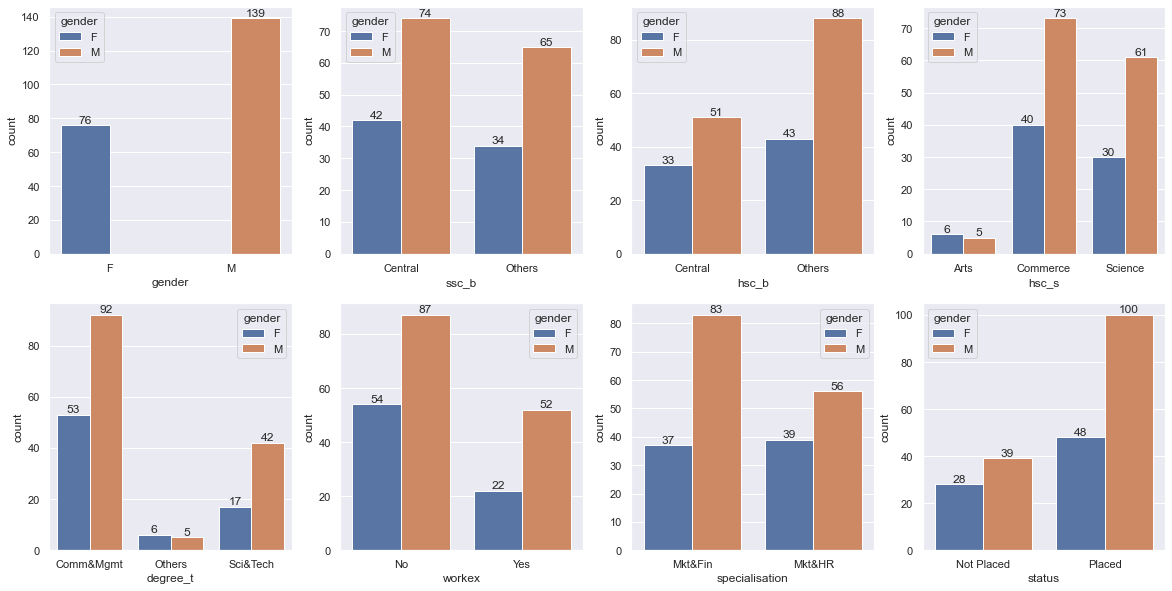

In [74]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

row = 0
col = 0
for columnName, columnType in placements_df.dtypes.iteritems():
  if columnType == 'category':
    ax = sns.countplot(x=columnName, hue='gender', data=placements_df, ax=axs[row][col])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

    col += 1
  
  if col == 4:
    row = 1
    col = 0


Since we have almost double the number of males than females, we can see that this ratio is roughly the same when it comes to the other categorical features.

Important facts:

- We can see that most of the people that have courses of Commerce and Since in the higher education also managed to get a degree in that field
- Most of the candidates do not have work experience
- Most of the candidates got a job in a company